In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [131]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [132]:
df = pd.read_parquet("prompt_results_all.parquet")

In [133]:
df.columns

Index(['name', 'prompt', 'ttr', 'flesch_reading_ease', 'open_ai_text_davinci',
       'cohere', 'open_ai_text_davinci_ttr', 'cohere_ttr',
       'open_ai_text_davinci_flesch_reading_ease',
       'cohere_flesch_reading_ease', 'open_ai_gpt_35', 'open_ai_gpt_4',
       'open_ai_gpt_35_ttr', 'open_ai_gpt_4_ttr',
       'open_ai_gpt_35_flesch_reading_ease',
       'open_ai_gpt_4_flesch_reading_ease', 'dw_count',
       'open_ai_text_davinci_dw_count', 'cohere_dw_count',
       'open_ai_gpt_35_dw_count', 'open_ai_gpt_4_dw_count'],
      dtype='object')

In [134]:
print(df.agg({'ttr': ['average', 'min', 'max'], 'flesch_reading_ease': ['average', 'min', 'max'], 'dw_count': ['average', 'min', 'max']}).to_markdown(tablefmt="grid"))

+---------+----------+-----------------------+------------+
|         |      ttr |   flesch_reading_ease |   dw_count |
+=========+==========+=======================+============+
| average | 0.734084 |               61.1273 |    18.1242 |
+---------+----------+-----------------------+------------+
| min     | 0.409091 |                3.63   |     2      |
+---------+----------+-----------------------+------------+
| max     | 1        |              104.13   |    49      |
+---------+----------+-----------------------+------------+


In [135]:
print(df.agg({'open_ai_text_davinci_ttr': ['average', 'min', 'max'], 'open_ai_text_davinci_flesch_reading_ease': ['average', 'min', 'max'], 'open_ai_text_davinci_dw_count': ['average', 'min', 'max']}).to_markdown(tablefmt="grid"))

+---------+----------------------------+--------------------------------------------+---------------------------------+
|         |   open_ai_text_davinci_ttr |   open_ai_text_davinci_flesch_reading_ease |   open_ai_text_davinci_dw_count |
+=========+============================+============================================+=================================+
| average |                  0.648829  |                                    33.3558 |                         20.8039 |
+---------+----------------------------+--------------------------------------------+---------------------------------+
| min     |                  0.0952381 |                                 -3770.39   |                          0      |
+---------+----------------------------+--------------------------------------------+---------------------------------+
| max     |                  1         |                                   206.84   |                         60      |
+---------+----------------------------+

In [136]:
print(df.agg({'open_ai_gpt_35_ttr': ['average', 'min', 'max'], 'open_ai_gpt_35_flesch_reading_ease': ['average', 'min', 'max'], 'open_ai_gpt_35_dw_count': ['average', 'min', 'max']}).to_markdown(tablefmt="grid"))

+---------+----------------------+--------------------------------------+---------------------------+
|         |   open_ai_gpt_35_ttr |   open_ai_gpt_35_flesch_reading_ease |   open_ai_gpt_35_dw_count |
+=========+======================+======================================+===========================+
| average |              0.63367 |                              43.4164 |                   57.7647 |
+---------+----------------------+--------------------------------------+---------------------------+
| min     |              0.16    |                           -1487.2    |                    0      |
+---------+----------------------+--------------------------------------+---------------------------+
| max     |              1       |                             206.84   |                  180      |
+---------+----------------------+--------------------------------------+---------------------------+


In [137]:
print(df.agg({'open_ai_gpt_4_ttr': ['average', 'min', 'max'], 'open_ai_gpt_4_flesch_reading_ease': ['average', 'min', 'max'], 'open_ai_gpt_4_dw_count': ['average', 'min', 'max']}).to_markdown(tablefmt="grid"))

+---------+---------------------+-------------------------------------+--------------------------+
|         |   open_ai_gpt_4_ttr |   open_ai_gpt_4_flesch_reading_ease |   open_ai_gpt_4_dw_count |
+=========+=====================+=====================================+==========================+
| average |            0.611343 |                             47.0304 |                  41.7712 |
+---------+---------------------+-------------------------------------+--------------------------+
| min     |            0.055794 |                          -1487.2    |                   0      |
+---------+---------------------+-------------------------------------+--------------------------+
| max     |            1        |                            206.84   |                 130      |
+---------+---------------------+-------------------------------------+--------------------------+


In [138]:
cols = [
    'ttr',
    'flesch_reading_ease',
    'dw_count',
    'open_ai_text_davinci_ttr',
    'open_ai_text_davinci_flesch_reading_ease',
    'open_ai_text_davinci_dw_count',
    'open_ai_gpt_35_ttr',
    'open_ai_gpt_35_flesch_reading_ease',
    'open_ai_gpt_35_dw_count',
    'open_ai_gpt_4_ttr',
    'open_ai_gpt_4_flesch_reading_ease',
    'open_ai_gpt_4_dw_count',
    'cohere_ttr',
    'cohere_flesch_reading_ease',
    'cohere_dw_count'
]

# Use Inter-Quartile Range (IQR) to detect outliers for above columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df1 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [139]:
len(df1)

117

/Users/narenyellavula/Projects/zee-thesis/zahraenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


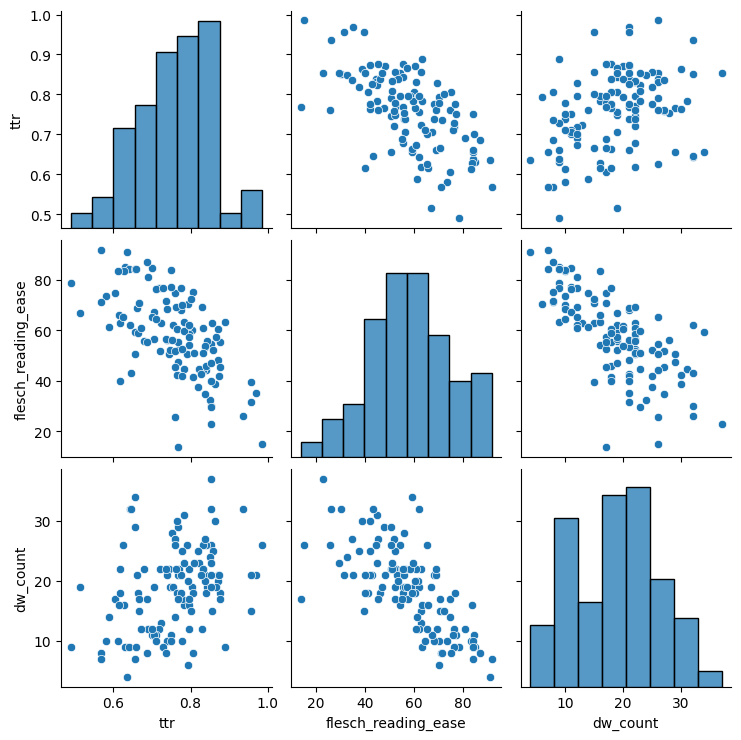

In [140]:
sns.pairplot(df1[["ttr", "flesch_reading_ease", "dw_count"]])

/Users/zahrazaredar/Projects/zee/zahraenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


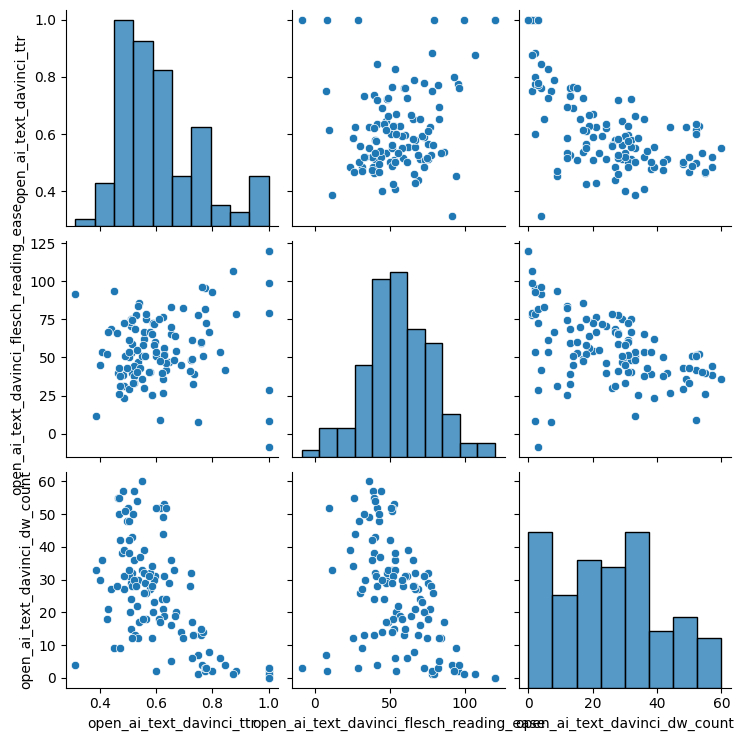

In [141]:
sns.pairplot(df1[["open_ai_text_davinci_ttr", "open_ai_text_davinci_flesch_reading_ease", "open_ai_text_davinci_dw_count"]])

/Users/narenyellavula/Projects/zee-thesis/zahraenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


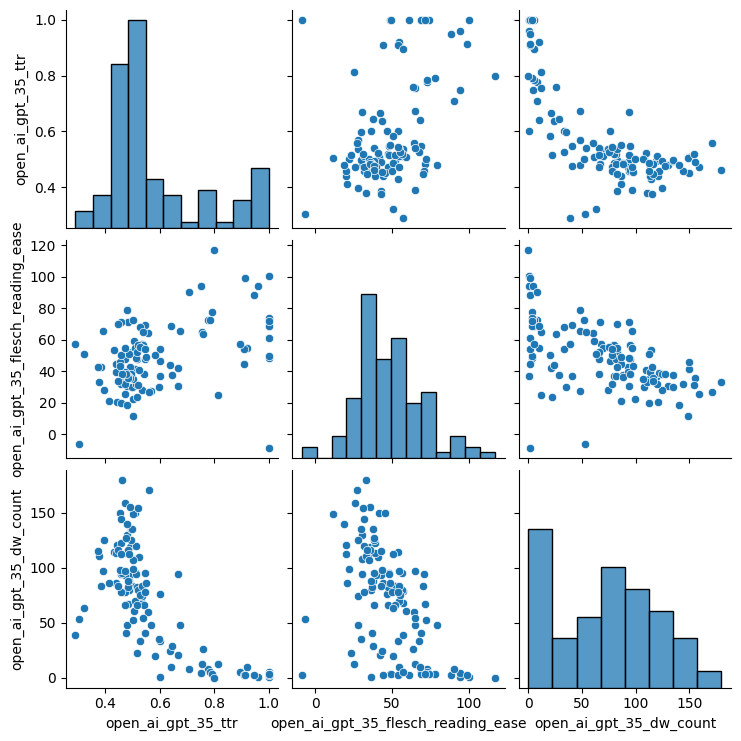

In [142]:
sns.pairplot(df1[["open_ai_gpt_35_ttr", "open_ai_gpt_35_flesch_reading_ease", "open_ai_gpt_35_dw_count"]])

/Users/narenyellavula/Projects/zee-thesis/zahraenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


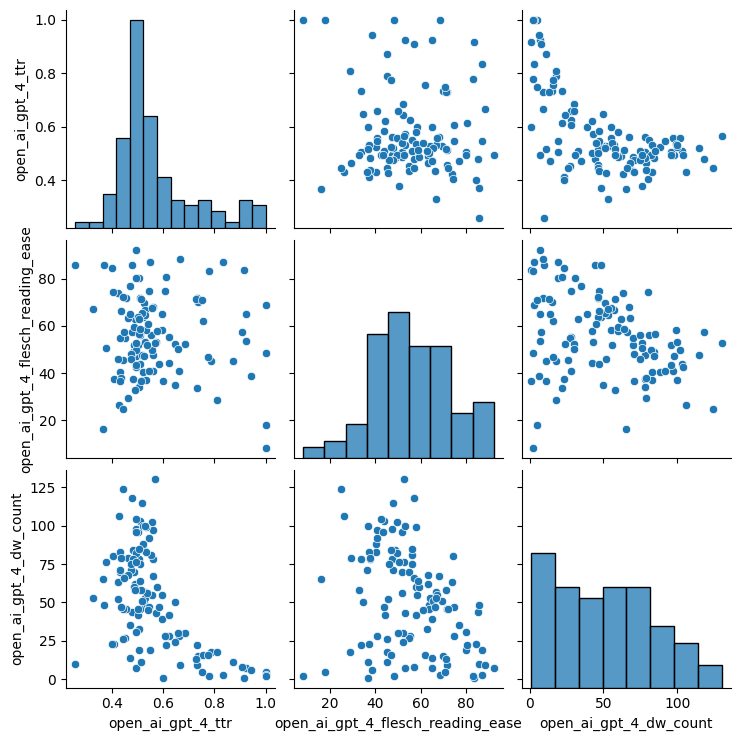

In [143]:
sns.pairplot(df1[["open_ai_gpt_4_ttr", "open_ai_gpt_4_flesch_reading_ease", "open_ai_gpt_4_dw_count"]])

/Users/narenyellavula/Projects/zee-thesis/zahraenv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


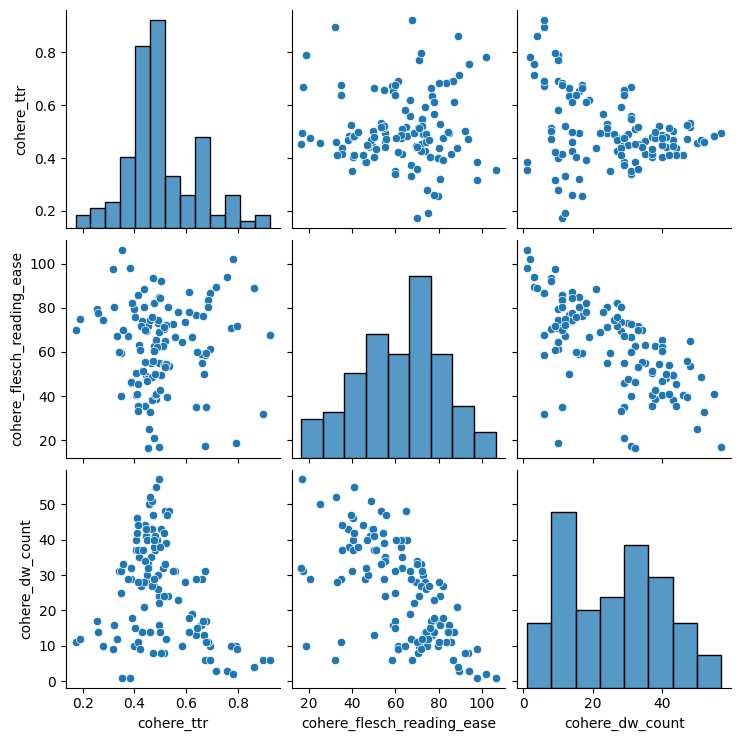

In [144]:
sns.pairplot(df1[["cohere_ttr", "cohere_flesch_reading_ease", "cohere_dw_count"]])

In [145]:
select_list = [
    'ttr', 'flesch_reading_ease', 'open_ai_text_davinci_ttr',
    'cohere_ttr', 'open_ai_gpt_35_ttr', 'open_ai_gpt_4_ttr',
    'open_ai_text_davinci_flesch_reading_ease',
    'cohere_flesch_reading_ease',
    'open_ai_gpt_35_flesch_reading_ease',
    'open_ai_gpt_4_flesch_reading_ease',
    'dw_count', 'open_ai_text_davinci_dw_count', 'cohere_dw_count',
    'open_ai_gpt_35_dw_count', 'open_ai_gpt_4_dw_count'
]

In [146]:
df2 = df1.filter(select_list)

<Axes: >

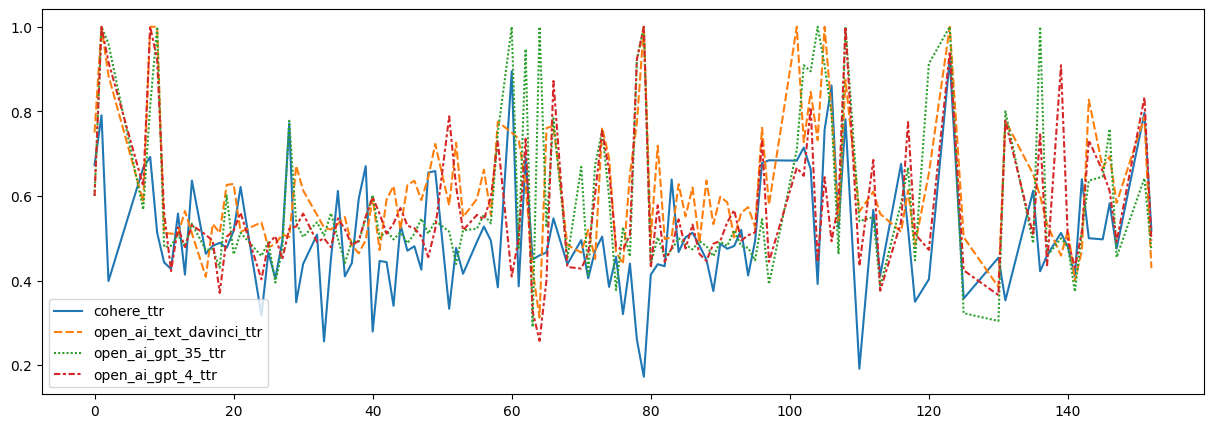

In [147]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df2[["cohere_ttr", "open_ai_text_davinci_ttr", "open_ai_gpt_35_ttr", "open_ai_gpt_4_ttr"]])

<Axes: >

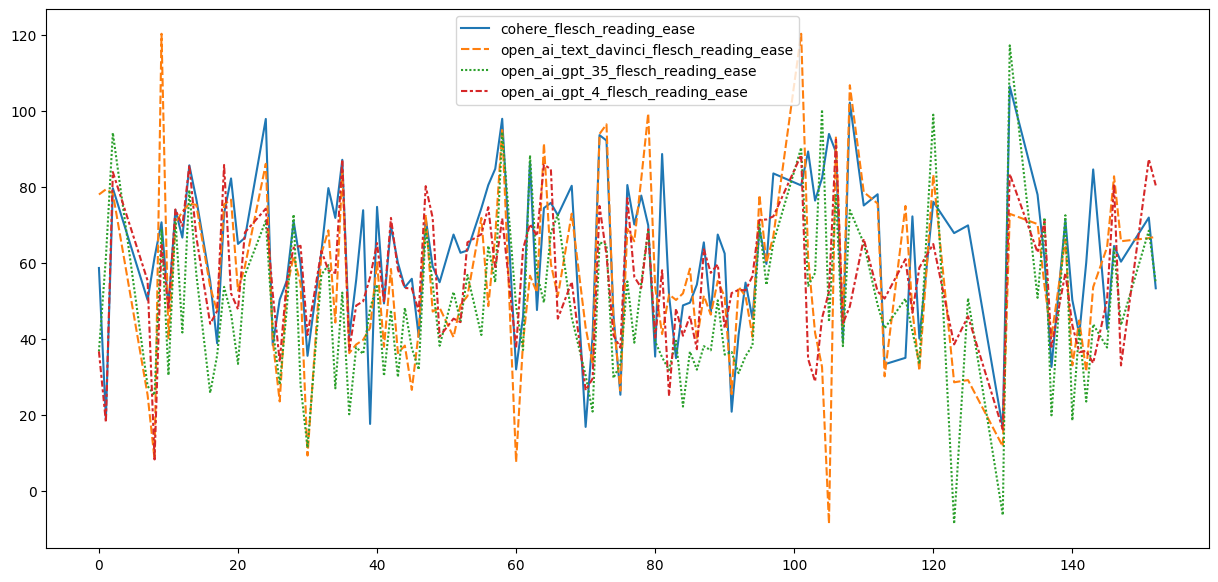

In [148]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(df2[["cohere_flesch_reading_ease", "open_ai_text_davinci_flesch_reading_ease", "open_ai_gpt_35_flesch_reading_ease", "open_ai_gpt_4_flesch_reading_ease"]])

<Axes: >

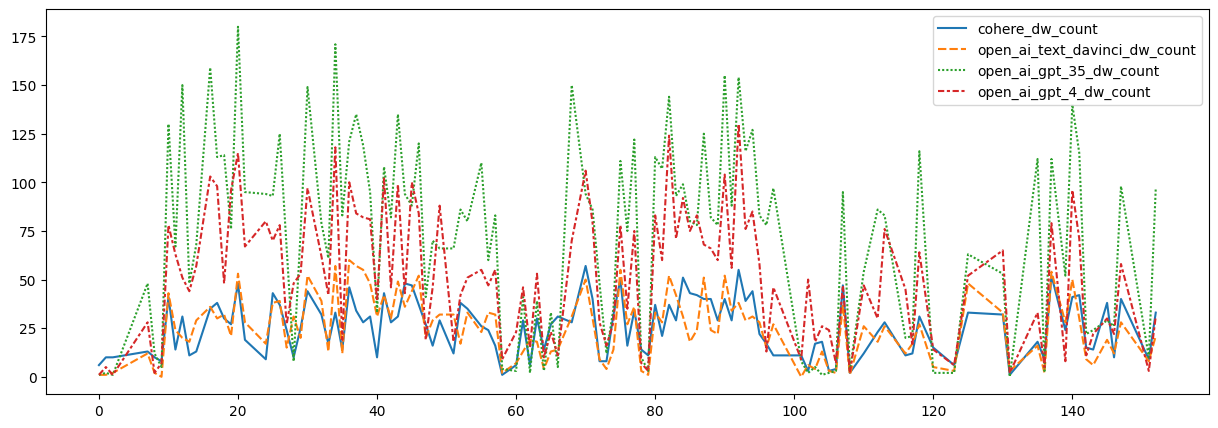

In [149]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df2[["cohere_dw_count", "open_ai_text_davinci_dw_count", "open_ai_gpt_35_dw_count", "open_ai_gpt_4_dw_count"]])

In [150]:
# g = sns.pairplot(df[["ttr", "flesch_reading_ease", "dw_count"]])
# g.map_lower(corrfunc)
# plt.show()

In [151]:
df1[df1["open_ai_text_davinci_flesch_reading_ease"] < 0]

,name,prompt,ttr,flesch_reading_ease,open_ai_text_davinci,cohere,open_ai_text_davinci_ttr,cohere_ttr,open_ai_text_davinci_flesch_reading_ease,cohere_flesch_reading_ease,...,open_ai_gpt_4,open_ai_gpt_35_ttr,open_ai_gpt_4_ttr,open_ai_gpt_35_flesch_reading_ease,open_ai_gpt_4_flesch_reading_ease,dw_count,open_ai_text_davinci_dw_count,cohere_dw_count,open_ai_gpt_35_dw_count,open_ai_gpt_4_dw_count
105,Legal Advisor,I want you to act as my legal advisor. I will ...,0.727273,76.62,Seek legal counsel immediately.,You should contact a lawyer as soon as possibl...,1.0,0.756757,-8.73,93.85,...,1. Call the police immediately at the scene of...,0.909091,0.644231,44.41,52.36,9,3,3,2,24


In [152]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [166]:
def compute_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    result = sid.polarity_scores(text)

    return result['compound']
    

In [176]:
df1['prompt_stmt'] = df.apply(lambda row: compute_sentiment(row['prompt']), axis=1)
df1['open_ai_text_davinci_stmt'] = df.apply(lambda row: compute_sentiment(row['open_ai_text_davinci']), axis=1)
df1['open_ai_gpt_35_stmt'] = df.apply(lambda row: compute_sentiment(row['open_ai_gpt_35']), axis=1)
df1['open_ai_gpt_4_stmt'] = df.apply(lambda row: compute_sentiment(row['open_ai_gpt_4']), axis=1)
df1['cohere_stmt'] = df.apply(lambda row: compute_sentiment(row['cohere']), axis=1)

/var/folders/xs/dyj7t99n13vgh_k7kvcd6hrr0000gn/T/ipykernel_41154/2215007815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['prompt_stmt'] = df.apply(lambda row: compute_sentiment(row['prompt']), axis=1)
/var/folders/xs/dyj7t99n13vgh_k7kvcd6hrr0000gn/T/ipykernel_41154/2215007815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['open_ai_text_davinci_stmt'] = df.apply(lambda row: compute_sentiment(row['open_ai_text_davinci']), axis=1)
/var/folders/xs/dyj7t99n13vgh_k7kvcd6hrr0000gn/T/ipykernel_4

In [177]:
df1['open_ai_gpt_35_stmt']

0      0.0000
1      0.8979
2      0.6239
7      0.9565
8      0.0000
        ...  
145    0.7650
146   -0.7096
147    0.9990
151    0.8834
152    0.9972
Name: open_ai_gpt_35_stmt, Length: 117, dtype: float64

<Axes: >

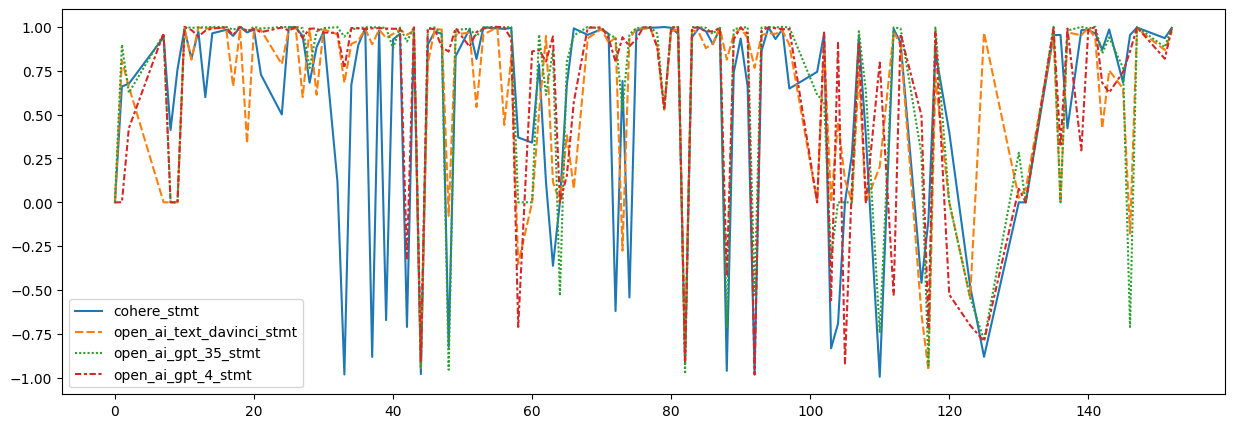

In [179]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df1[["cohere_stmt", "open_ai_text_davinci_stmt", "open_ai_gpt_35_stmt", "open_ai_gpt_4_stmt"]])

In [183]:
df1.agg({'open_ai_text_davinci_stmt': ['average'], 'cohere_stmt': ['average'], 'open_ai_gpt_35_stmt': ['average'], 'open_ai_gpt_4_stmt': ['average']})


,open_ai_text_davinci_stmt,cohere_stmt,open_ai_gpt_35_stmt,open_ai_gpt_4_stmt
average,0.636025,0.55462,0.672072,0.653447
